In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
style.use('ggplot')

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
# import statsmodels.api as sm

In [2]:
df = pd.read_csv('../data_fetch/robinhood_data/100_most_popular_cleaned.csv')
df.head()

,Date,CPRX,CRBP,BABA,SNE,APHA,GOOGL,MSFT,AMZN,NRZ,...,SPY,UCO,VSLR,IBIO,SPHD,PSEC,KODK,SRNE,FCEL,NVAX
0,2015-09-08,3.89,1.8200,60.91,24.90,11.75,643.88,43.89,517.54,14.02,...,197.43,1206.5,13.26,7.200,31.450,7.99,14.98,13.23,10.8360,212.8
1,2015-09-09,3.97,1.8411,64.04,25.06,11.75,643.41,43.07,516.89,13.79,...,194.79,1127.0,13.18,7.200,31.070,7.93,15.11,12.65,11.1600,203.4
2,2015-09-10,4.14,1.8500,63.83,25.93,11.75,651.08,43.29,522.24,13.95,...,195.85,1186.5,12.99,7.100,31.100,7.97,15.25,13.28,11.5200,202.0
3,2015-09-11,3.90,1.9900,64.63,26.16,11.75,655.30,43.48,529.44,14.24,...,196.74,1142.5,13.14,7.031,31.240,7.94,15.48,13.53,11.3076,200.0
4,2015-09-14,4.11,2.1300,62.60,25.96,11.75,652.47,43.04,521.38,14.16,...,196.01,1100.0,12.66,6.691,31.222,7.91,14.99,12.89,11.0400,195.0


In [3]:
# import datetime as dt
# df['Date'] = pd.to_datetime(df['Date'])
# df['Date'] = df['Date'].map(dt.datetime.toordinal)

In [4]:
df_mr = df.tail(50) # getting the most recent data past fifty days
df_mr

,Date,CPRX,CRBP,BABA,SNE,APHA,GOOGL,MSFT,AMZN,NRZ,...,SPY,UCO,VSLR,IBIO,SPHD,PSEC,KODK,SRNE,FCEL,NVAX
1211,2020-06-26,4.510,7.800,215.71,69.68,4.070,1362.54,196.33,2692.87,7.14,...,300.05,27.21,9.20,2.15,31.80,5.070,2.30,5.870,2.090,77.39
1212,2020-06-29,4.560,7.910,215.02,68.72,4.290,1397.17,198.44,2680.38,7.41,...,304.46,29.13,9.49,2.46,32.62,5.070,2.36,6.110,2.335,83.61
1213,2020-06-30,4.620,8.390,215.70,69.13,4.290,1418.05,203.51,2758.82,7.43,...,308.36,28.68,9.90,2.22,32.92,5.110,2.23,6.280,2.260,83.35
1214,2020-07-01,4.820,8.390,215.95,70.39,4.360,1442.00,204.70,2878.70,7.24,...,310.52,29.28,9.92,2.08,32.94,5.060,2.24,6.930,2.280,79.70
1215,2020-07-02,4.810,7.950,223.60,70.23,4.300,1469.93,206.26,2890.30,6.90,...,312.23,30.02,10.07,1.96,33.02,5.050,2.21,6.850,2.520,81.64
1216,2020-07-06,4.900,7.910,240.00,70.53,4.380,1499.65,210.70,3057.04,7.20,...,317.05,30.51,10.63,2.00,33.10,4.760,2.26,7.165,2.870,79.44
1217,2020-07-07,5.020,8.030,236.51,69.16,4.330,1489.92,208.25,3000.12,6.80,...,313.78,30.13,14.69,2.25,32.57,4.800,2.12,7.380,2.830,104.56
1218,2020-07-08,5.080,7.940,257.68,69.79,4.310,1503.60,212.83,3081.11,6.83,...,316.18,30.95,15.40,2.31,32.55,4.860,2.15,7.290,2.960,98.30
1219,2020-07-09,5.020,7.700,261.58,71.53,4.190,1518.66,214.32,3182.63,6.49,...,314.38,29.26,15.33,2.28,31.77,4.685,2.09,7.750,3.040,96.30
1220,2020-07-10,4.940,7.680,261.01,73.94,4.300,1539.01,213.67,3200.00,6.82,...,317.59,30.61,15.97,2.22,32.69,4.750,2.10,8.060,3.070,94.36


In [5]:
df_mr['Date'] = np.arange(0,len(df_mr['Date']))

<ipython-input-5-16f86c668abe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mr['Date'] = np.arange(0,len(df_mr['Date']))


In [6]:
df_mr # data from the past month

,Date,CPRX,CRBP,BABA,SNE,APHA,GOOGL,MSFT,AMZN,NRZ,...,SPY,UCO,VSLR,IBIO,SPHD,PSEC,KODK,SRNE,FCEL,NVAX
1211,0,4.510,7.800,215.71,69.68,4.070,1362.54,196.33,2692.87,7.14,...,300.05,27.21,9.20,2.15,31.80,5.070,2.30,5.870,2.090,77.39
1212,1,4.560,7.910,215.02,68.72,4.290,1397.17,198.44,2680.38,7.41,...,304.46,29.13,9.49,2.46,32.62,5.070,2.36,6.110,2.335,83.61
1213,2,4.620,8.390,215.70,69.13,4.290,1418.05,203.51,2758.82,7.43,...,308.36,28.68,9.90,2.22,32.92,5.110,2.23,6.280,2.260,83.35
1214,3,4.820,8.390,215.95,70.39,4.360,1442.00,204.70,2878.70,7.24,...,310.52,29.28,9.92,2.08,32.94,5.060,2.24,6.930,2.280,79.70
1215,4,4.810,7.950,223.60,70.23,4.300,1469.93,206.26,2890.30,6.90,...,312.23,30.02,10.07,1.96,33.02,5.050,2.21,6.850,2.520,81.64
1216,5,4.900,7.910,240.00,70.53,4.380,1499.65,210.70,3057.04,7.20,...,317.05,30.51,10.63,2.00,33.10,4.760,2.26,7.165,2.870,79.44
1217,6,5.020,8.030,236.51,69.16,4.330,1489.92,208.25,3000.12,6.80,...,313.78,30.13,14.69,2.25,32.57,4.800,2.12,7.380,2.830,104.56
1218,7,5.080,7.940,257.68,69.79,4.310,1503.60,212.83,3081.11,6.83,...,316.18,30.95,15.40,2.31,32.55,4.860,2.15,7.290,2.960,98.30
1219,8,5.020,7.700,261.58,71.53,4.190,1518.66,214.32,3182.63,6.49,...,314.38,29.26,15.33,2.28,31.77,4.685,2.09,7.750,3.040,96.30
1220,9,4.940,7.680,261.01,73.94,4.300,1539.01,213.67,3200.00,6.82,...,317.59,30.61,15.97,2.22,32.69,4.750,2.10,8.060,3.070,94.36


In [7]:
# formatting data into matricies
date = np.array(df_mr['Date']).reshape(-1, 1)
close = np.array(df_mr['AMZN']).reshape(-1, 1)

In [8]:
# splitting the data
date_train, date_test, close_train, close_test = train_test_split(
    date, close, test_size=0.30, random_state=42)

In [9]:
lin_reg = LinearRegression() # using linear regression Ordinary Least Squares, 
# goal :  minimize the residual sum of squares between the observed targets in the dataset

In [10]:
# training the model
lin_reg.fit(date_train, close_train)

LinearRegression()

In [11]:
# test model
close_output = lin_reg.predict(date_test)
close_output

array([[3014.24204136],
       [3314.08821214],
       [3210.29530687],
       [3383.28348232],
       [3060.37222148],
       [3417.88111741],
       [3164.16512675],
       [3152.63258172],
       [3233.36039693],
       [3083.43731154],
       [3002.70949633],
       [2910.44913609],
       [3291.02312208],
       [2956.57931621],
       [2898.91659106]])

In [12]:
close_test # values seem close but not exact

array([[2999.9 ],
       [3284.72],
       [3148.16],
       [3450.96],
       [3099.91],
       [3368.  ],
       [3138.83],
       [3111.89],
       [3162.24],
       [3008.91],
       [3008.87],
       [2890.3 ],
       [3260.48],
       [3182.63],
       [2878.7 ]])

In [13]:
# usin the score method to test the output of our model
lin_reg.score(date_test, close_test)

0.7871325138446115

In [14]:
# for y = mx + b 
lin_reg.intercept_, lin_reg.coef_

(array([2864.31895597]), array([[11.53254503]]))

The accurcacy is 78% not bad but we can do better

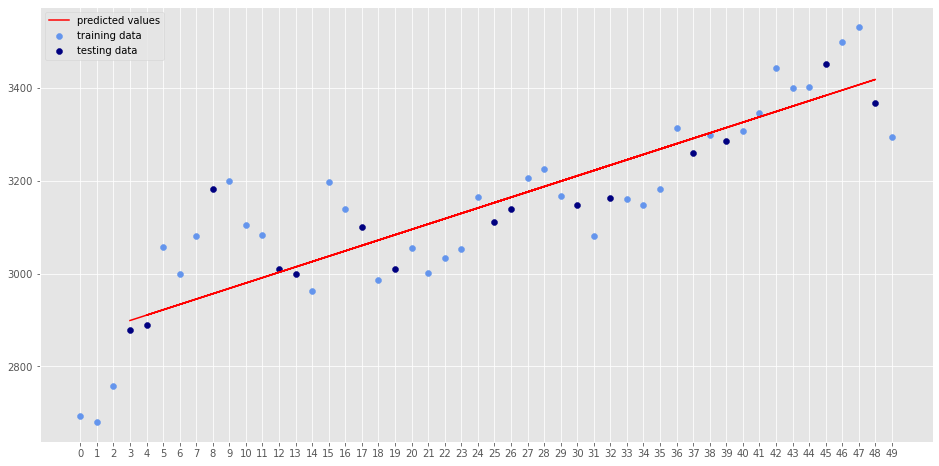

In [15]:
# plotting the values 

plt.figure(figsize=(16,8))

plt.scatter(date_train, close_train, c='cornflowerblue', label='training data')
plt.scatter(date_test, close_test, c='navy', label='testing data')
plt.plot(date_test, close_output, c='red', label='predicted values')

plt.xticks(df_mr['Date'])
plt.legend()
plt.show()

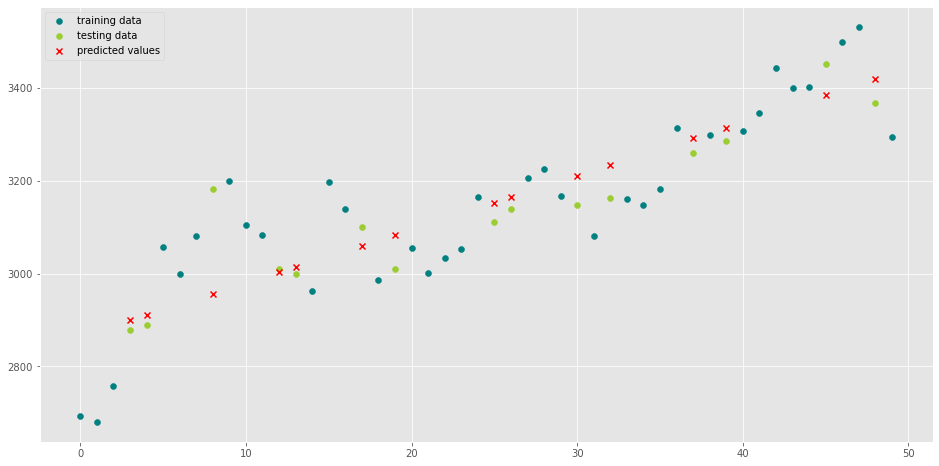

In [16]:
# trying this same experiment but with polynomial regression
n = 2

# creating pipeline with steps 1. Polynomial Regression and 
# 2. Ridge linear model does linear least squares function
# this is for training the model
# model = make_pipeline(PolynomialFeatures(n), Ridge()) 
model = make_pipeline(PolynomialFeatures(n), LinearRegression()) 

model.fit(date_train, close_train) # training model




# testing model
close_output = model.predict(date_test)
close_output

# plotting the change
plt.figure(figsize=(16,8))
plt.scatter(date_train, close_train, c='teal', label='training data')
plt.scatter(date_test, close_test, c='yellowgreen', label='testing data')
plt.scatter(date_test, close_output, c='red', marker='x', label='predicted values')
plt.legend()
plt.show()

Data looks more similar lets look at the confidence interval, but Very little increase in accurcacy with Polynomial regression

In [17]:
model.score(date_test, close_test) # the confidence interval

0.7872618049337132

In [18]:
# without the pipeline
n = 2
poly_features = PolynomialFeatures(degree=n, include_bias=False)
date_poly = poly_features.fit_transform(date_train)

In [19]:
lin_reg.fit(date_poly, close_train)
lin_reg.intercept_, lin_reg.coef_

(array([2864.51590971]), array([[1.15073125e+01, 5.17931606e-04]]))

In [20]:
lin_reg.score(date_poly, close_train)

0.7221919871929015

This type of testing with the confidence interval is called cross validation. This is done by holding out part of the data set for testing after training the model with the rest of the data. In this case we are training the model with date_train and close_train while using date_test to produce the new output close_output. These values can be compared with close_test flatout (seen below) but using a confidence interval will show the relationship in a clearer light.
 
The most interesting thing about this is that the polynomial regression algorithm seems to have the highest confidence interval at n = 9. At this point the interval is at .90

What to be careful of is overfitting the training data. This might lead to less accurate predictions in the future. This might also be why the confidence interval starts to drop at 10. When overfitting is done the model isn't very good at predicting new values in the future.

Another way to test and see if the model is overfitting or underfitting the data is looking at the learning curves. Learning Curves: plots of the models performance on the training set and the validation set as a function of the training set size

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [22]:
def plot_learning_curves(model, X, y):
    
    # splitting the training and validation data
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m]) # train the model
        
        y_train_predict = model.predict(X_train[:m]) # testing the model outputs training points
        y_val_predict = model.predict(X_val) # testing the model outputs validation points
        
        # using mean squared error to calculates how close the trained data lands to the predicted values
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict)) # training errors
        val_errors.append(mean_squared_error(y_val, y_val_predict)) # validation errors
        
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.show()
        

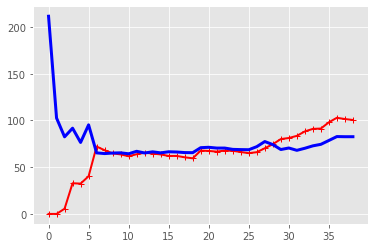

In [23]:
# example of underfitting 
lin_reg = LinearRegression() 
plot_learning_curves(lin_reg, date, close)

c:\users\craig\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.63085e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\users\craig\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69832e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\users\craig\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.47923e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\users\craig\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37693e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\users\craig\appdata\local\programs\python\pyt

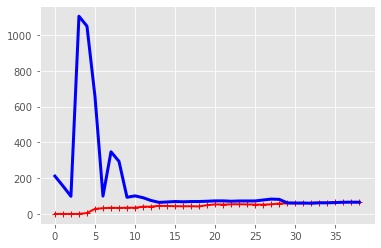

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=5)),
#     ('lin_reg', LinearRegression())
    ('ridge_rg', Ridge(alpha=1))
])

plot_learning_curves(polynomial_regression, date, close)

In [25]:
polynomial_regression.fit(date_train, close_train)
close_out = polynomial_regression.predict(date_test)
close_out, close_test

c:\users\craig\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.05637e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


(array([[3110.71182807],
        [3335.55205527],
        [3131.56412378],
        [3432.44653598],
        [3095.00510666],
        [3410.74799843],
        [3084.94193142],
        [3079.10218539],
        [3168.20238553],
        [3084.2601251 ],
        [3110.30870745],
        [2939.19059354],
        [3285.88737416],
        [3072.15330513],
        [2884.83027785]]),
 array([[2999.9 ],
        [3284.72],
        [3148.16],
        [3450.96],
        [3099.91],
        [3368.  ],
        [3138.83],
        [3111.89],
        [3162.24],
        [3008.91],
        [3008.87],
        [2890.3 ],
        [3260.48],
        [3182.63],
        [2878.7 ]]))

In [26]:
polynomial_regression.score(date_test, close_test)

0.8589275150082201

In [27]:
polynomial_regression.score(date_test, close_output)

0.8433749905871493